<a href="https://colab.research.google.com/github/LeuroPrince/Literature-Reproduction-for-WenLab/blob/main/Reproduction_of_figure_2D_for_WenLab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')
fig2D_file_path = '/content/drive/My Drive/WenLab/Figure 2-source data for Figure 2D.xlsx'


Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

fig_2D_data_summary = pd.read_excel(fig2D_file_path,sheet_name='Summary',header = 2)
fig_2D_data_noATR = pd.read_excel(fig2D_file_path,sheet_name='AIB_Chrimson_no ATR',header = 2)
fig_2D_data_chrimson = pd.read_excel(fig2D_file_path,sheet_name='AIB_Chrimson',header = 2)
fig_2D_data_ChR2 = pd.read_excel(fig2D_file_path,sheet_name='QW373_ALM AVM  ChR2', header = 2)
fig_2D_data_ChR2_Arch = pd.read_excel(fig2D_file_path,sheet_name='WEN0127_ALM AVM  ChR2;AIB  Arch',header = 2)
# fig_2D_data_summary.head()
# fig_2D_data_noATR.head()
# fig_2D_data_chrimson.head()
# fig_2D_data_ChR2.head()
# fig_2D_data_ChR2_Arch.head()

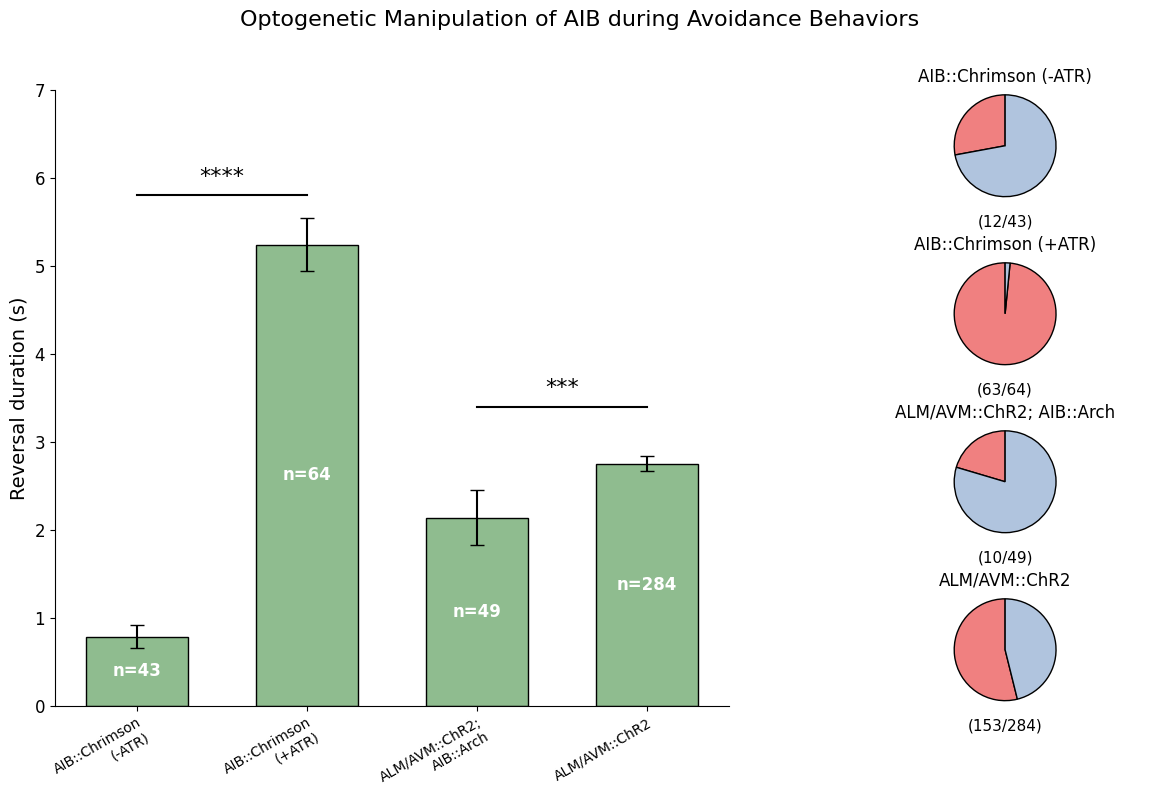

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Define the Data
# The data from your 'Summary.csv' is included here directly
# to make the code self-contained and runnable anywhere.

# Data for the Bar Chart
bar_chart_data = {
    'Condition': [
        'AIB::Chrimson\n(-ATR)',
        'AIB::Chrimson\n(+ATR)',
        'ALM/AVM::ChR2;\nAIB::Arch',
        'ALM/AVM::ChR2'
    ],
    'Mean_Reversal_Duration': [0.7867, 5.2411, 2.1382, 2.7516],
    'SEM': [0.1307, 0.3022, 0.3139, 0.0813],
    'N': [43, 64, 49, 284]
}
df_bar = pd.DataFrame(bar_chart_data)

# Data for the Pie Charts
pie_chart_data = {
    'Condition': [
        'AIB::Chrimson\n(-ATR)',
        'AIB::Chrimson\n(+ATR)',
        'ALM/AVM::ChR2;\nAIB::Arch',
        'ALM/AVM::ChR2'
    ],
    'Turn': [12, 63, 10, 153],
    'No_Turn': [31, 1, 39, 131]
}
df_pie = pd.DataFrame(pie_chart_data)


# Step 2: Create the Figure and Subplots
fig = plt.figure(figsize=(14, 8))
# Use GridSpec for a more complex layout: 4 rows, 2 columns.
# The bar chart will span all 4 rows of the first column.
gs = fig.add_gridspec(4, 2, width_ratios=[2.5, 1], hspace=0.5, wspace=0.3)

# Add the bar chart subplot
ax_bar = fig.add_subplot(gs[:, 0])
# Add the four pie chart subplots
pie_axes = [fig.add_subplot(gs[i, 1]) for i in range(4)]


# Step 3: Plot the Bar Chart
colors = ['darkseagreen', 'darkseagreen', 'darkseagreen', 'darkseagreen']
bars = ax_bar.bar(
    df_bar['Condition'],
    df_bar['Mean_Reversal_Duration'],
    yerr=df_bar['SEM'],
    capsize=5,
    color=colors,
    edgecolor='black',
    width=0.6
)

# Add the number of trials (n) inside each bar
for i, bar in enumerate(bars):
    height = bar.get_height()
    ax_bar.text(
        bar.get_x() + bar.get_width() / 2.0,
        height / 2.0, # Position text in the middle of the bar
        f"n={df_bar['N'][i]}",
        ha='center',
        va='center',
        color='white',
        fontsize=12,
        fontweight='bold'
    )

# Add significance markers (* symbols)
ax_bar.plot([0, 1], [5.8, 5.8], color='black', lw=1.5)
ax_bar.text(0.5, 5.9, '****', ha='center', va='bottom', fontsize=16)
ax_bar.plot([2, 3], [3.4, 3.4], color='black', lw=1.5)
ax_bar.text(2.5, 3.5, '***', ha='center', va='bottom', fontsize=16)

# Style the bar chart axes and labels
ax_bar.set_ylabel('Reversal duration (s)', fontsize=14)
ax_bar.set_ylim(0, 7)
ax_bar.spines['top'].set_visible(False)
ax_bar.spines['right'].set_visible(False)
# Correctly rotate and align x-axis tick labels
plt.setp(ax_bar.get_xticklabels(), rotation=30, ha="right", rotation_mode="anchor")
ax_bar.tick_params(axis='y', labelsize=12)


# Step 4: Plot the Pie Charts
pie_colors = [['lightcoral', 'lightsteelblue'], ['lightcoral', 'lightsteelblue'], ['lightcoral', 'lightsteelblue'], ['lightcoral', 'lightsteelblue']]

for i, ax in enumerate(pie_axes):
    # Get data for the current pie chart
    condition_data = df_pie.iloc[i]
    sizes = [condition_data['Turn'], condition_data['No_Turn']]
    total = sum(sizes)

    # Plot the pie chart
    ax.pie(
        sizes,
        colors=pie_colors[i],
        startangle=90,
        wedgeprops={'edgecolor': 'black'}
    )

    # Add a title with the condition and the turn fraction
    title = condition_data['Condition'].replace('\n', ' ')
    turn_fraction_text = f"({condition_data['Turn']}/{total})"
    # Place the text below the pie chart for better readability
    ax.set_title(title, fontsize=12)
    ax.text(0, -1.5, turn_fraction_text, ha='center', va='center', fontsize=11)
    ax.axis('equal') # Ensures the pie is drawn as a circle


# Step 5: Final Touches and Display
# Add a main title for the entire figure
fig.suptitle('Optogenetic Manipulation of AIB during Avoidance Behaviors', fontsize=16, y=0.98)
# Adjust layout to prevent labels from overlapping
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()